## Trabajo Práctico - Fashion MNIST

La primera parte de este práctico te guiará a traves de un modelo de clasificación.



En este notebook entrenaremos una red neuronal para hacer clasificación de prendas de vestir en imágenes de 28x28

In [ ]:
# Importar numpy, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# Importar tensorflow como tf; desde tensorflow importar keras
import tensorflow as tf
from tensorflow import keras

**Importar el set de datos de moda de MNIST**

Utilizaremos el set de datos de Fashion MNIST que contiene mas de 70000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

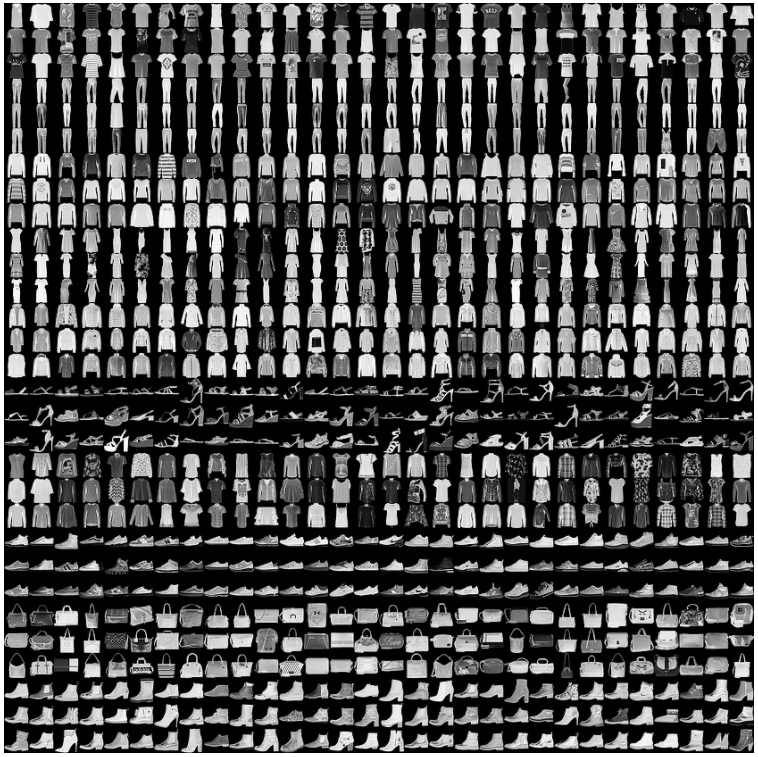

In [ ]:
# Importamos el dataset que lleva como nombre fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

#Esta función nos permite importar y dividir los datos en train y test sets
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los labels son un arreglo de enteros, que van del 0 al 9. Estos corresponden a la class de ropa que la imagen representa.

In [ ]:
# Crea una lista de strings con las (etiquetas) clases de ropa en el siguiente orden:
# 'Polera', 'Pantalon', 'Jersey', 'Vestido', 'Abrigo','Sandalia', 'Camisa', 'Zapatilla', 'Bolso', 'Bota'

clases = ['Polera', 'Pantalon','Jersey', 'Vestido', 'Abrigo', 'Sandalia','Camisa','Zapatilla','Bolso','Bota']

Exploremos los datos:

In [ ]:
# El tamaño de las imagenes de entrenamiento
train_images.shape

(60000, 28, 28)

In [ ]:
# El tamaño de las etiquetas (labels) de entrenamiento
train_labels.shape

(60000,)

In [ ]:
# El tamaño de las imagenes de testeo
test_images.shape

(10000, 28, 28)

In [ ]:
# El tamaño de las etiquetas (labels) de testeo
test_labels.shape

(10000,)

**Pre-procesamiento de los datos**

El set de datos debe ser pre-procesada antes de entrenar la red. Si inspeccionamos la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

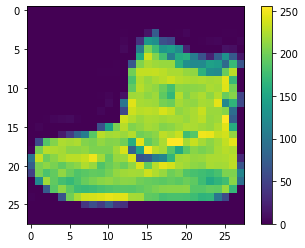

In [ ]:
# Visualizaremos la primera imagen con una barra de colores que muestre los valores dentro de la imagen
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Normalizamos los datos, recuerda que para eso debemos dividir cada valor de cada pixel entre el rango de valores de toda la imagen

(Consejo: sobre_escribe los valores)

In [ ]:
#Normalizando las imagenes de entrenamiento
train_images = train_images / 255.0
#Normalizando las imagenes de testeo
test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

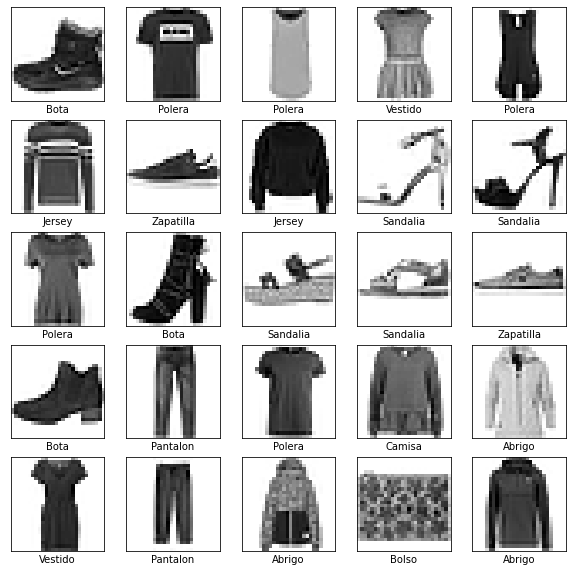

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(clases[train_labels[i]])
plt.show()

**Construcción del modelo**

Los bloques de construccion basicos de una red neuronal son las capas o layers. Las capas extraen representaciones de el set de datos que se les alimentan.

La mayoria de los modelos de Machine Learning consisten en unir capas sencillas. La mayoria de las capas como tf.keras.layers.Dense, tienen parametros que son aprendidos durante el entrenamiento.

In [ ]:
# Crea un modelo con las siguientes capas:
# Input layer: Flatten a la que le pases el tamaño de la imagen de entrada en (28,28)
# Hidden layer: Dense con 128 neuronas y relu como funcion de activacion
# Output layer: Dense con la cantidad de neuronas igual a la cantidad de clases del data set y softmax como función de activacion

model = keras.Sequential([
                          keras.layers.Flatten(input_shape= (28,28)),
                          keras.layers.Dense(128, activation= 'relu'),
                          keras.layers.Dense(10, activation= 'softmax')
])

La primera capa de esta red, tf.keras.layers.Flatten, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Esta capa no tiene parametros que aprender; solo reformatea los datos de entrada.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas keras.layers.Dense. Estas estan densamente conectadas , o completamente conectadas (fully conected layers). La primera capa Dense tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos softmax que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

**Compilar el modelo**

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

Loss function —Esto mide que tan exacto es el modelo durante el entrenamiento. Se quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.

Optimizer — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

Metrics — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [ ]:
# Compila el modelo con 'adam' como optimizador, 'sparse_categorical_crossentropy' como loss function, y 'accuracy' como metrics
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Entrena el modelo**

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos train_images y train_labels.

El modelo aprende a asociar imagenes y etiquetas.
Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo test_images. Verifique que las predicciones sean iguales a las etiquetas de el arreglotest_labels.

Para comenzar a entrenar, llame el metodo model.fit, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [ ]:
# Llama al metodo .fit sobre el modelo y pasale las imagenes de entrenamiento y sus etiquetas como parámetros.
# Tambien debes colocar 10 epocas de entrenamiento
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3745 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3151 - accuracy: 0.8838
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2956 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2797 - accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2688 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2569 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2482 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

**Evaluar accuracy de testeo**

In [ ]:
# El método .evaluate de del modelo te devolverá dos valores:
# El costo de testeo y el accuracy de testeo
# Recibirá como parámetros las imagenes de testeo y sus etiquetas
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Imprime el accuracy de testo
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3417 - accuracy: 0.8819

Test accuracy: 0.8819000124931335


**Hacer predicciones**

In [ ]:
# Haremos predicciones con el data set de testeo
# Pasa las imagenes de testo como parámetro al método .predict del modelo
predictions = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
# ¿Cuál es el tamaño del vector predictions que acabamos de calcular?
predictions.shape

(10000, 10)

Una prediccion es un arreglo de 10 numeros. (uno por cada clase)

Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de ropa.

In [ ]:
# Visualiza el primer elemento del vector predictions
predictions[0]

array([2.6766203e-08, 4.1520679e-10, 9.1300950e-10, 4.1820753e-12,
       3.3752872e-09, 8.0511684e-04, 7.6017115e-10, 2.9538244e-03,
       7.2343189e-09, 9.9624097e-01], dtype=float32)

Podemos verificar cual es el elemento que tiene mayor "confianza" dentro del vector

In [ ]:
# Utiliza la funcion argmax de numpy para ver cual es el mayor valor del primer elemento del vector predictions
resp = np.argmax(predictions[0])
resp

9

Este valor representa la clase número 9 del vector de clases, ¿Cuál es esa?

In [ ]:
# Utiliza la respuesta de la anterior celda para verificar a que clase pertenece esta predicción
# Llama al vector "clases" en la posicion "resp"
clases[resp]

'Zapatilla'

Verifiquemos que se hizo la predicción correcta visualizando la imagen:

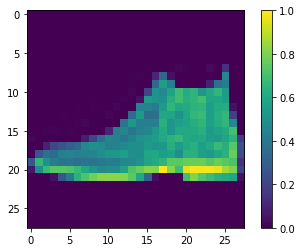

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# EJERCICIO:
La predicción número 13 (no olvides tomar en cuenta que comenzamos a contar en 0) hizo una predicción incorrecta.

1.- ¿Puedes verificar que clasificación hizo?

2.- ¿Cuál era la predicción correcta?

3.- ¿Qué porcentaje de confianza tiene el modelo para esta clasificación equivocada?

4.- ¿Qué porcentaje de confianza tiene para la clase correcta?

###1. Verificamos que clasificación hizo

In [ ]:
#Predecimos sobre la imagen deseada
predict = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
# Obtenemos la respuesta
resp = np.argmax(predict[12])
resp

7

In [ ]:
# Verificamos a qué clase corresponde esta predicción
clases[resp]

'Zapatilla'

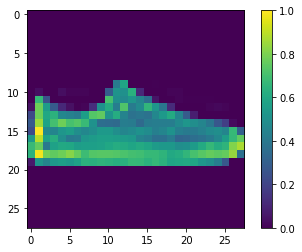

In [ ]:
#Verificamos que se hizo la predicción correcta visualizando la imagen
plt.figure()
plt.imshow(test_images[12])
plt.colorbar()
plt.grid(False)
plt.show()

###2. ¿Cuál predicción era la correcta?

En este caso, la predicción obtuvo la respuesta correcta, es decir, predijo que era una zapatilla y la imagen en efecto, muestra una zapatilla

###3.- ¿Qué porcentaje de confianza tiene el modelo para esta clasificación equivocada?


In [ ]:
predict[12]

array([3.2515835e-08, 8.8907300e-06, 2.0119367e-06, 2.1178162e-06,
       4.9311780e-07, 6.1846118e-02, 1.6666733e-07, 9.3047571e-01,
       7.6641426e-03, 4.5634522e-07], dtype=float32)

In [ ]:
# Vemos cual elemento tiene mayor confianza en el vector.
resp = np.argmax(predict[12])
resp

7

In [ ]:
#Obtenemos el valor 7 en el vector predict
predict[12,[7]]

array([0.9304757], dtype=float32)

In [ ]:
#Obtenemos el porcentaje de confianza
predict[12,[7]]*100

array([93.04757], dtype=float32)

En este caso, como la predicción fue la correcta, obtenemos que el porcentaje de confianza para la clase 7 (Zapatilla) de esta predicción es de 93,04%. Al tener un alto porcentaje, esta es una predicción exitosa.